# GPU는 터지고 CPU는 느려서 만든 통계분석자료 모음

# Pickle

In [ ]:
# # 데이터 저장

# import pickle

# with open(pickle_path, 'wb') as f:
#     pickle.dump((X_train, X_test, y_train, y_test), f)
# print("데이터 pickle 파일로 저장 완료")

데이터 pickle 파일로 저장 완료


In [ ]:
# 데이터 불러오기
import os, pickle
data_dir = "C:/Users/USER/Desktop/Braineewha_DeepLearning_11/Kaggle"
pickle_path = os.path.join(data_dir, "dataset.pkl")  # pickle 파일 경로

with open(pickle_path, 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)
print("Pickle 파일에서 데이터 불러오기 완료")

Pickle 파일에서 데이터 불러오기 완료


# * 데이터 분포

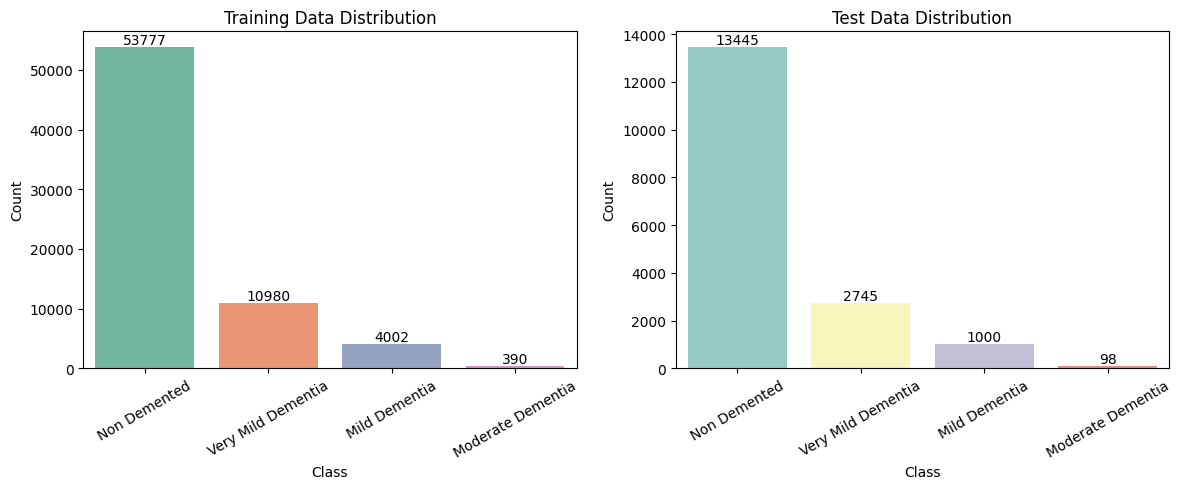

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 각 클래스별 데이터 개수 계산
train_counts = {
    "Non Demented": sum(y_train == 0),
    "Very Mild Dementia": sum(y_train == 1),
    "Mild Dementia": sum(y_train == 2),
    "Moderate Dementia": sum(y_train == 3)
}

test_counts = {
    "Non Demented": sum(y_test == 0),
    "Very Mild Dementia": sum(y_test == 1),
    "Mild Dementia": sum(y_test == 2),
    "Moderate Dementia": sum(y_test == 3)
}

# DataFrame 생성
train_df = pd.DataFrame(list(train_counts.items()), columns=["Class", "Count"])
test_df = pd.DataFrame(list(test_counts.items()), columns=["Class", "Count"])

# 그래프 그리기
plt.figure(figsize=(12, 5))

# 훈련 데이터 그래프
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="Class", y="Count", data=train_df, palette="Set2")
plt.title("Training Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=30)
# 막대 위에 개수 표시
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

# 테스트 데이터 그래프
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="Class", y="Count", data=test_df, palette="Set3")
plt.title("Test Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=30)
# 막대 위에 개수 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


# *Odds ratio
1보다 클 경우 해당 클래스의 예측이 의미 있는 수준임 
모델 만들면 추가할 것

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from math import log, sqrt, exp

# 클래스 라벨 정의
class_labels = {
    "Non Demented": 0,
    "Very Mild Dementia": 1,
    "Mild Dementia": 2,
    "Moderate Dementia": 3,
}

# 예측 및 실제 클래스 로드 (예제를 위해 all_predictions와 all_true_labels가 필요함)
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

# Odds Ratio 계산 및 시각화 데이터 저장
odds_ratios = []
ci_lowers = []
ci_uppers = []
p_values = []

for class_name, idx in class_labels.items():
    TP = np.sum((all_predictions == idx) & (all_true_labels == idx))
    FP = np.sum((all_predictions == idx) & (all_true_labels != idx))
    FN = np.sum((all_predictions != idx) & (all_true_labels == idx))
    TN = np.sum((all_predictions != idx) & (all_true_labels != idx))

    # ZeroDivision 방지
    if TP == 0 or TN == 0 or FP == 0 or FN == 0:
        TP += 1
        FP += 1
        FN += 1
        TN += 1

    odds_ratio = (TP * TN) / (FP * FN)
    odds_ratios.append(odds_ratio)

    # 신뢰 구간 계산
    se = sqrt(1 / TP + 1 / TN + 1 / FP + 1 / FN)
    z = 1.96  # 95% 신뢰 수준
    log_or = log(odds_ratio)
    ci_lower = exp(log_or - z * se)
    ci_upper = exp(log_or + z * se)
    ci_lowers.append(ci_lower)
    ci_uppers.append(ci_upper)

    # P-value 계산
    _, p_value, _, _ = chi2_contingency([[TP, FP], [FN, TN]])
    p_values.append(p_value)

    print(f"{class_name}: Odds Ratio = {odds_ratio}, 95% CI = ({ci_lower}, {ci_upper}), P-value = {p_value}")

# Odds Ratio 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_labels.keys(), odds_ratios, yerr=[ci_upper - ci_lower for ci_lower, ci_upper in zip(ci_lowers, ci_uppers)],
        capsize=5, color='skyblue', alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Odds Ratio")
plt.title("Odds Ratio with 95% Confidence Interval")
plt.axhline(y=1, color='red', linestyle='--')
plt.show()


# * 차원축소기술

1-1. PCA 2d

In [ ]:
!pip install umap-learn
!pip install ipywidgets



X_test shape: (17288, 128, 128, 3), y_test shape: (17288,)


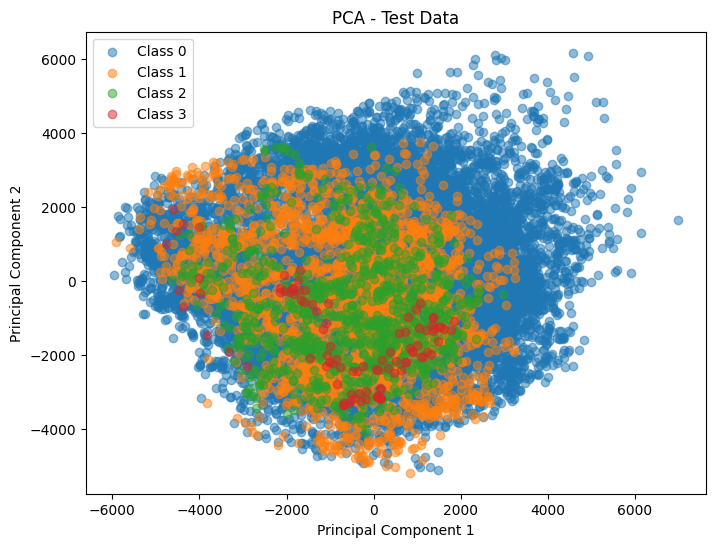

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
try:
    from importlib.metadata import version, PackageNotFoundError
except ImportError:
    from importlib_metadata import version, PackageNotFoundError
from tqdm import tqdm

# 테스트 데이터의 형태 확인
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# 1. PCA를 사용한 차원 축소
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test.reshape(X_test.shape[0], -1))

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(
        X_test_pca[y_test == label, 0], 
        X_test_pca[y_test == label, 1], 
        label=f"Class {label}", alpha=0.5
    )
plt.title("PCA - Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

1-2. PCA 3d

X_test shape: (17288, 128, 128, 3), y_test shape: (17288,)


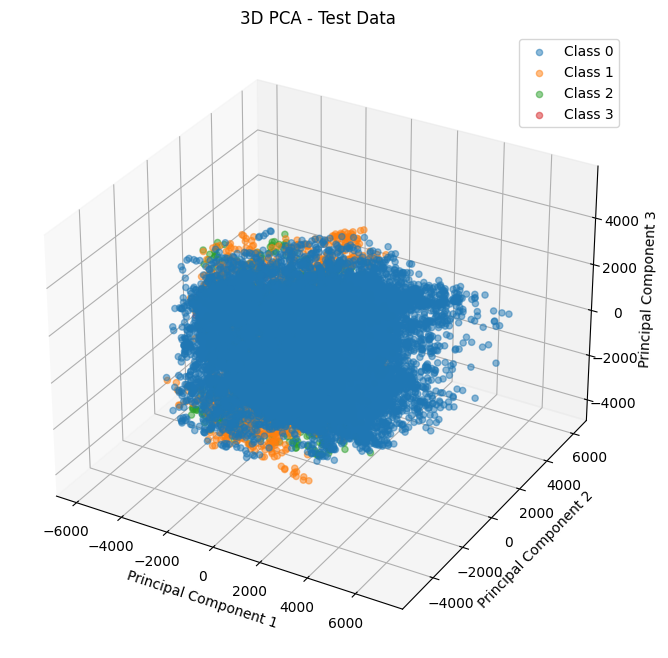

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 테스트 데이터의 형태 확인
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# PCA를 사용한 차원 축소 (3개의 주성분)
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test.reshape(X_test.shape[0], -1))

# 3D PCA 결과 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(np.unique(y_test)):
    ax.scatter(
        X_test_pca[y_test == label, 0], 
        X_test_pca[y_test == label, 1], 
        X_test_pca[y_test == label, 2], 
        label=f"Class {label}", alpha=0.5
    )

ax.set_title("3D PCA - Test Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show(browse)


1-3. PCA 3d rotational plotly

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.io as pio
from sklearn.metrics import silhouette_score

# 테스트 데이터의 형태 확인
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# PCA를 사용한 차원 축소 (3개의 주성분)
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test.reshape(X_test.shape[0], -1))


# Silhouette Score 계산
silhouette_avg = silhouette_score(X_test_pca, y_test)
print(f"PCA Silhouette Score: {silhouette_avg:.4f}")


# DataFrame 생성
df = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'PC3': X_test_pca[:, 2],
    'Label': y_test,
    'Size': np.full(X_test_pca.shape[0], 2)  # 점의 크기를 줄이기 위해 'Size' 컬럼 추가

})

# Plotly로 3D 그래프 생성
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Label', opacity=0.7, size='Size')
fig.update_layout(title=f"3D PCA - Test Data (Silhouette Score: {silhouette_avg:.4f})")
pio.renderers.default = 'browser'  # 브라우저에서 그래프를 실행하도록 설정
fig.show()

2. UMAP

In [ ]:
# 2. UMAP을 사용한 차원 축소
umap_reducer = umap.UMAP(n_components=2)
X_test_umap = umap_reducer.fit_transform(X_test.reshape(X_test.shape[0], -1))

# UMAP 결과 시각화
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(
        X_test_umap[y_test == label, 0], 
        X_test_umap[y_test == label, 1], 
        label=f"Class {label}", alpha=0.5
    )
plt.title("UMAP - Test Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()
plt.show()

3. t-SNE

In [ ]:
# 3. t-SNE를 사용한 차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test.reshape(X_test.shape[0], -1))

# t-SNE 결과 시각화
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(
        X_test_tsne[y_test == label, 0], 
        X_test_tsne[y_test == label, 1], 
        label=f"Class {label}", alpha=0.5
    )
plt.title("t-SNE - Test Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()